In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%load_ext autoreload
%autoreload 2

import main

In [2]:
labels = pd.Series(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
train_path = '../blobs/notMNIST_large'
test_path = '../blobs/notMNIST_small'

def get_train_dir(label):
    return os.path.join(train_path, label)

def get_test_dir(index):
    return os.path.join(test_path, label)

[52912, 52912, 52912, 52912, 52912, 52912, 52912, 52912, 52912, 52911]


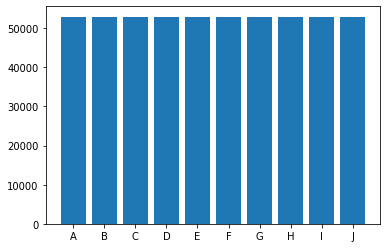

In [3]:
counts = [
    len(os.listdir(td))
    for td in (get_train_dir(label) for label in labels)
]
print(counts)
plt.bar(labels, counts)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []
for label in labels:
    train_dir = get_train_dir(label)
    files = pd.Series(os.path.join(train_dir, name) for name in os.listdir(train_dir))
    # reducing the number of samples for faster processing
    files = files.sample(len(files) // 10 * 6)
    train, val = train_test_split(files, test_size=0.05)
    x_train.extend(train)
    y_train.extend(label for _ in range(len(train)))
    x_val.extend(val)
    y_val.extend(label for _ in range(len(val)))
    
    test_dir = get_test_dir(label)
    test = [os.path.join(test_dir, name) for name in os.listdir(test_dir)]
    x_test.extend(test)
    y_test.extend(label for _ in range(len(test)))

Shuffle items to avoid training on consecutive labels

In [9]:
main.shuffle_in_unison(x_train, y_train)
main.shuffle_in_unison(x_val, y_val)
main.shuffle_in_unison(x_test, y_test)

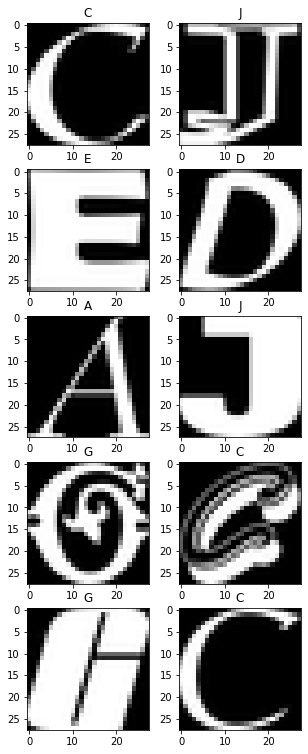

In [10]:
fig = plt.figure(figsize=(5, 13))
for i in range(10):
    img = main.load_image(x_train[i])
    ax = fig.add_subplot(5, 2, i + 1)
    ax.imshow(img, cmap='gray')
    ax.set_title(y_train[i])

plt.show()

Duplicates in training and test datasets have been removed. See `main.py` for details. See `removed.txt` for a list of removed files.

In [ ]:
from sklearn.linear_model import LogisticRegression

